In [17]:
def load(path, metric='validation/psnr_gray_shave_x4', interval=5):
    from tensorboard.backend.event_processing import event_accumulator
    ea = event_accumulator.EventAccumulator(path)
    return [i.value for i in ea.Reload().Scalars(metric)][::interval]

In [22]:
psnr_base = load('baseline/events.out.tfevents.1635752265.k8sdeploy-n184.35.0', interval=10)
psnr_adv = load('init/events.out.tfevents.1635739751.k8sdeploy-n185.36.0', interval=10)
plot_x = [i*10 for i in range(100)]

In [23]:
psnr_edsr = load('edsr/events.out.tfevents.1633520757.6529c17e56ee.1.0', metric='validation/psnr255', interval=3)
psnr_imdn = load('imdn/events.out.tfevents.1633425571.24fbee9c5215.1.0', metric='validation/psnr255', interval=3)

In [24]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

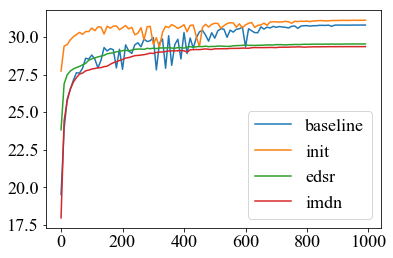

In [25]:
font = {'family': 'Times New Roman',
           'weight': 'normal',
           'size': 18}
matplotlib.rc("font", **font)
plt.plot(plot_x, psnr_base, label='baseline')
plt.plot(plot_x, psnr_adv, label='init')
plt.plot(plot_x, psnr_edsr, label='edsr')
plt.plot(plot_x, psnr_imdn, label='imdn')
plt.legend(loc='lower right')
# plt.savefig('val_psnr'+".svg", dpi=1000, bbox_inches='tight')
plt.show()